#### Многослойный персептрон для распознавание базы рукаписных цифр MNIST


Для распознавания базы рукописных цифр был использован многослойный персептор. Был реализован алгоритм обратного распространения ошибки для обучение нейронной сети. Для распознавания была использована топология с двумя скрытыми слоями с 500 и 150 нейронами соответственно(в результате сеть имела четыре слоя по 784-500-150-10 нейронов соответственно). В качестве функции активации была выбрана сигмоидная функция $\frac{1}{1 + e^{-2*x}}$

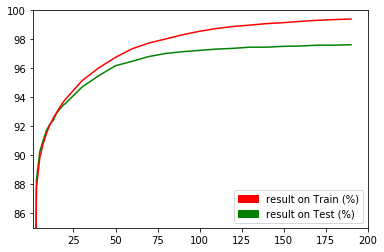

In [8]:
import subprocess
import pickle
import os

from itertools import chain
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

mnist_train_images = 'mnist\\train-images.idx3-ubyte'
mnist_train_labels = 'mnist\\train-labels.idx1-ubyte'
mnist_test_images = 'mnist\\t10k-images.idx3-ubyte'
mnist_test_labels = 'mnist\\t10k-labels.idx1-ubyte'

exe_path = 'NeuralNetwork.exe'
neural_net_path = 'results\\res.nn'


def train():
    subprocess.run([exe_path, 'train', mnist_train_images, mnist_train_labels, neural_net_path])


def test():
    x = []
    y_train = []
    y_test = []
    
    for i in chain(range(1, 20, 2), range(20, 200, 10)):
        print(i)
        x.append(i)
    
        nn_path = neural_net_path + str(i)
        result = subprocess.run([exe_path, 'test', mnist_test_images, mnist_test_labels, nn_path], stdout=subprocess.PIPE)
        y_test.append(result.stdout.decode('utf-8'))
    
        result = subprocess.run([exe_path, 'test', mnist_train_images, mnist_train_labels, nn_path], stdout=subprocess.PIPE)
        y_train.append(result.stdout.decode('utf-8'))

    plt.plot(x, y_test, 'g-', x, y_train, 'r-')
    plt.axis([1, 200, 85, 100])
    red_line = mpatches.Patch(color='red', label='result on Train (%)')
    green_line = mpatches.Patch(color='green', label='result on Test (%)')
    plt.legend(handles=[red_line, green_line])
    plt.show()
    
test()

Обучабщая часть базы MNIST состоит из 60000 изображений размером 28х28 и соответствующую метку цифры для этого изображения. Тестовая часть состоит из 10000 изоюражений в том же формате. Все изображение обучающей выборки перед началом обучения были приведены к бинарному формату(оригинальное изобраение содержит 28х28 чисел в промежетку [0;1]). На графике выше можно увидеть зависимость полученного результата на обучающей и тестовой базе от количества эпох обучения. Эпохой обучения называется период, за которое нейронная сеть во время обучения использовала каждое изображение из обучающей базы один раз. 

Спустя 200 эпох обучения был получен результат на тестовой выборке 97.6% точности распознавания. Эти результаты соответствуют результатам Яна Лекуна [mnist-dataset](http://yann.lecun.com/exdb/mnist/), полученные на этой базе, используя многослойнный персептор с аналогичной топологией(784-500-150-10).

Ниже показана матрица ошибок, где по строчкам указана реальная цифра для тестового изображения, а по столбцам та цирфа, которую распознала нейронная сеть. По этой таблице видно, что больше всего сеть путает цифру 4 с цифрой 9, цифру 8 с цифрой 3 и цифры 5 и 3.

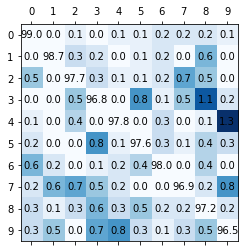

In [9]:
PICKLE_PATH = 'dump.pkl'


def test_matrix():
    if os.path.exists(PICKLE_PATH):
        res = pickle.load(open(PICKLE_PATH, 'rb'))
    else:
        nn_path = neural_net_path + str(200)
        result = subprocess.run([exe_path, 'testEx', mnist_test_images, mnist_test_labels, nn_path],
                                stdout=subprocess.PIPE)
        res = result.stdout.decode('utf-8')
        pickle.dump(res, open(PICKLE_PATH, 'wb'))

    count_classes = 10

    conf_mat = np.zeros([count_classes, count_classes])

    row_number = 0

    for line in res.splitlines():
        a = [float(x) for x in line.split(' ') if x]
        conf_mat[row_number, :] = a
        row_number += 1

    conf_mat_zeros = conf_mat.copy()

    for i in range(0, count_classes):
        conf_mat_zeros[i, i] = 0

    fig, ax = plt.subplots()

    ax.matshow(conf_mat_zeros, cmap=plt.cm.Blues)

    for i in range(0, count_classes):
        for j in range(0, count_classes):
            ax.text(j, i, str(conf_mat[i, j] * 100), va='center', ha='center')

    ax.set_xticks(range(0, count_classes))
    ax.set_yticks(range(0, count_classes))

    plt.show()
    
test_matrix()